In [49]:
import cv2 
import pytesseract
import numpy as np
from typing import OrderedDict
import matplotlib.pyplot as plt

img = cv2.imread('/home/vimalkumar/Documents/UIC/uic_test/sample/REF1-030322-10-7_230337_00000227.TIF',0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)

image_data = pytesseract.image_to_data(res, output_type = pytesseract.Output.DICT,config="--psm 6")
print(image_data["text"])


['', '', '', '', 'aJjL', 'UNIVERSITY', 'OF', 'ILLINOIS', '840', 'Bp.', 'Wood', 'Steet', '', '[Im', 'Hose', 'tal', '&', 'Health', 'Sc', 'ences', 'System', 'Roo', '(M', "O'750)", '', '————-Chang', 'gmed', 'ne', 'Fo', 'good', '————', 'Chcago', 'IInos', '60612', '', 'Ph', '#', '(877)FOR', 'LABS', '', 'R22', 'OL35914', 'CLIA', 'ID#', '1400664392', '', 'Reference', 'Laborato:', 'CAP', 'LAP#', '1889701', '', 'ry', 'Frederick', 'Behm', 'MD', '', 'Cl', 'n', 'cal', 'Med', 'cal', 'Director', '', 'Clinical', 'Laboratory', 'Requisition', '', '|', 'PATENT', 'LAS', 'NAME', 'F', 'RST', 'NAME', 'M', 'MRN', 'SSN', 'DOB', '', 'Walker', 'DAVID', '661155', '07/14/1957', '', 'ADDRESS', 'HOME', 'PHONE', 'WORK', 'PHONE', 'SEX', '', 'M', '', 'CTY', 'STATE', 'ZP', 'GUARANTOR', '', 'PHYS', 'C', 'AN', 'Cc', 'NC', 'OCA', 'ON', 'CODE', 'B', 'oO', '', 'Chandler', 'Sara', 'DHS', '/', 'Chester', 'Mental', 'A146', 'PROVIDER', '', 'Health', 'Center', '', 'co', 'LEC', 'EDDA', 'E', 'CO', 'ECTED', 'T', 'ME', '', '02/18/202

In [50]:


#img = cv.imread('/home/vimalkumar/Documents/UIC/UIC Sample Images/REF1-010622-5-1_10005.TIF')
# plt.figure(figsize=(15,15))
# plt.imshow(img)
key_vals = ["PATIENT"]
to_find = key_vals[0]


for key in key_vals:
    to_find = key.lower()
    found_val = ""
    for i in range(len(image_data['text'])):
        if to_find in image_data['text'][i].lower():
            x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
            if to_find == "DAte":
                zoning_area = (x-15,y-20,x+w+10,h+y+20)
#             elif to_find == "4":
#                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
#             elif to_find=="Date":
                
#                 zoning_area = (x-60,y-10,x+w+100,h+y+10)
            
            else:
                #zoning_area = (x-30,y-10,x+w+300,h+y+58)
                zoning_area = (x-15,y-10,x+w+150,h+y+50)
            cv.rectangle(res, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)
            plt.figure(figsize=(15,15))
            plt.imshow(res)
            break


    for i in range(len(image_data['text'])):
        x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
        if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
            found_val += image_data['text'][i]+" "

    print(f"{to_find} = {found_val}")
    
    found_val = found_val.replace('!@#$%^&*()[]{};:,./<>?\|`~-=_+','')
    print(found_val)
    
    output_list = found_val.split(' ')
    
    output_list = ' '.join(output_list).split()
    output_list = [x.lower() for x in output_list]
    
    print(output_list)
# cv.imshow("ABC", img)
# cv.waitKey(0)
# cv.imwrite("ABC.Jpeg",img)

patient = PATENT LAS NAME 
PATENT LAS NAME 
['patent', 'las', 'name']


In [7]:
output_list

['first', 'name', 'arron', 'y48115']

In [69]:
out = output_list[-2:]
if 'mi' in out:
    print('yes')
    #first_name = del[out['name']]
    out.remove('mi')
    #print(out)
    output_name = ' '.join([str(elem) for elem in out])
    print(output_name)
else:
    #print('no')
    #print(out)
    output_name = ' '.join([str(elem) for elem in out])
    print(output_name)

yes
humberto


In [291]:


#img = cv.imread('/home/vimalkumar/Documents/UIC/UIC Sample Images/REF1-010622-5-1_10005.TIF')
# plt.figure(figsize=(15,15))
# plt.imshow(img)
key_vals = ["PATIENT"]
last_names = []
def last_name(key_vals):
    to_find = key_vals[0]


    for key in key_vals:
        to_find = key.lower()
        found_val = ""
        for i in range(len(image_data['text'])):
            if to_find in image_data['text'][i].lower():
                x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
                if to_find == "DAte":
                    zoning_area = (x-10,y-20,x+w+10,h+y+20)
    #             elif to_find == "4":
    #                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
    #             elif to_find=="Date":

    #                 zoning_area = (x-60,y-10,x+w+100,h+y+10)

                else:
                    zoning_area = (x-15,y-10,x+w+150,h+y+50)
                cv.rectangle(img, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)
#                 plt.figure(figsize=(15,15))
#                 plt.imshow(img)
                break


        for i in range(len(image_data['text'])):
            x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
            if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
                found_val += image_data['text'][i]+" "

        print(f"{to_find} = {found_val}")

        found_val = found_val.replace('.','')
        print(found_val)

        output_list = found_val.split(' ')

        output_list = ' '.join(output_list).split()
        output_list = [x.lower() for x in output_list]

        print(output_list)
        
        out = output_list[-2:]
        if 'name' in out:
            #print('yes')
            #first_name = del[out['name']]
            out.remove('name')
            #print(out)
            output_name = ' '.join([str(elem) for elem in out])
            print('name :',output_name)
            last_names.append(output_name)
        else:
            #print(out)
            output_name = ' '.join([str(elem) for elem in out])
            print('name :',output_name)
            last_names.append(output_name)


In [292]:
last_name(key_vals)

patient =    PATIENT LAST NAME    Nykoluk 
   PATIENT LAST NAME    Nykoluk 
['patient', 'last', 'name', 'nykoluk']
name : nykoluk


In [293]:
last_names

['nykoluk']

In [283]:
output_list

['first', 'name', 'tia', 'marie']

In [276]:
final_output(output_list)

name : chafee


In [265]:
def final_output(output_list):
    out = output_list[-2:]
    if 'name' in out:
        #print('yes')
        #first_name = del[out['name']]
        out.remove('name')
        #print(out)
        output_name = ' '.join([str(elem) for elem in out])
        print(output_name)
    else:
        #print(out)
        output_name = ' '.join([str(elem) for elem in out])
        print(output_name)
    
    

In [33]:
output_list

['first', 'name', 'mi', 'mary', 'juanita']

In [35]:
out = output_list[-2:]
if 'mi' in out:
    print('yes')
    #first_name = del[out['name']]
    out.remove('mi')
    #print(out)
    output_name = ' '.join([str(elem) for elem in out])
    print(output_name)
else:
    print('no')
    #print(out)
    output_name = ' '.join([str(elem) for elem in out])
    print(output_name)

no
mary juanita


# UIC Final code without model

In [41]:
import cv2 as cv
import pytesseract
from typing import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
import re
import time
import os

start = time.time()
print(start)

path = '/home/vimalkumar/Documents/UIC/uic_test/sample'

last_name = []
first_name = []
file_name = []
    
count = 1
for images in os.listdir(path):
    print(count , '  ' ,images)
    count += 1
    file_name.append(images)
    

    img = cv.imread(os.path.join(path,images))

    image_data = pytesseract.image_to_data(img, output_type = pytesseract.Output.DICT,config="--psm 6")
    #print(image_data["text"])
    
    #plt.figure(figsize=(15,15))
    #plt.imshow(img)
    key_vals = ["PATIENT"]
    to_find = key_vals[0]


    for key in key_vals:
        to_find = key.lower()
        found_val = ""
        for i in range(len(image_data['text'])):
            if to_find in image_data['text'][i].lower():
                x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
                if to_find == "DAte":
                    zoning_area = (x-10,y-20,x+w+10,h+y+20)
    #             elif to_find == "4":
    #                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
    #             elif to_find=="Date":

    #                 zoning_area = (x-60,y-10,x+w+100,h+y+10)

                else:
                    zoning_area = (x-15,y-10,x+w+150,h+y+50)
                cv.rectangle(img, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)
                
                break


        for i in range(len(image_data['text'])):
            x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
            if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
                found_val += image_data['text'][i]+" "

        #print(f"{to_find} = {found_val}")
        found_val = re.sub('[!,*)@#%(&~$_?.^’“`:”|+><"]', "", found_val)
        #print(found_val)
        output_list = found_val.split(' ')
        output_list = ' '.join(output_list).split()
        output_list = [x.lower() for x in output_list]
        print(output_list)
        
        if len(output_list) == 0:
            last_name.append(' ')
            
        else:
        
            out = output_list[-2:]
            if 'name' in out:
                #print('yes')
                #first_name = del[out['name']]
                out.remove('name')
                #print(out)
                output_name = ' '.join([str(elem) for elem in out])
                output_name = output_name.replace('last','')
                pattern = re.compile(r'\w+[-\s]?\w+')
                output_name = re.findall(pattern,output_name)
                output_name = ''.join(output_name)
                print('name :',output_name)
                last_name.append(output_name.upper())
            else:
                #print(out)
                output_name = ' '.join([str(elem) for elem in out])
                output_name = output_name.replace('last','')
                pattern = re.compile(r'\w+[-\s]?\w+')
                output_name = re.findall(pattern,output_name)
                output_name = ''.join(output_name)
                print('name :',output_name)
                last_name.append(output_name.upper())
                
                
    key_vals = ["FIRST"]
    to_find = key_vals[0]


    for key in key_vals:
        to_find = key.lower()
        found_val = ""
        for i in range(len(image_data['text'])):
            if to_find in image_data['text'][i].lower():
                x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
                if to_find == "DAte":
                    zoning_area = (x-10,y-20,x+w+10,h+y+20)
    #             elif to_find == "4":
    #                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
    #             elif to_find=="Date":

    #                 zoning_area = (x-60,y-10,x+w+100,h+y+10)

                else:
                    zoning_area = (x-30,y-10,x+w+300,h+y+50)
                cv.rectangle(img, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)
#                 plt.figure(figsize=(15,15))
#                 plt.imshow(img)
                break


        for i in range(len(image_data['text'])):
            x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
            if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
                found_val += image_data['text'][i]+" "

        #print(f"{to_find} = {found_val}")
        found_val = re.sub('[!,*)@#%(&~$_?.^’`:”|“+><"]', "", found_val)
        #print(found_val)
        output_list = found_val.split(' ')
        output_list = ' '.join(output_list).split()
        output_list = [x.lower() for x in output_list]
        print(output_list)
        
        if len(output_list) == 0:
            first_name.append(' ')
            
        else:
        
            out = output_list[-2:]
            for m in range(len(out)):
                if out[m]=='ml' or out[m]=='mr' or out[m]=='mj'or out[m]=='mo' or out[m]=='mrn' or out[m]=='mrne':
                    out[m] = 'mi'
                elif out[m] == 'mt' or out[m]=='me':
                    out[m] = 'mi'
            
            if 'mi' in out:
                #print('yes')
                #first_name = del[out['name']]
                out.remove('mi')
                
                #print(out)
                output_name = ' '.join([str(elem) for elem in out])
                pattern = re.compile(r'\w+[-\s]?\w+')
                output_name = re.findall(pattern,output_name)
                if 'name' in output_name:
                    output_name.remove('name')
                    
                    output_name = ''.join(output_name)
                    output_name=output_name.replace('name','')
                    print('name :',output_name)
                    first_name.append(output_name.upper())
                    
                            
                else:
                    
                    output_name = ''.join(output_name)
                    output_name=output_name.replace('name','')
                    print('name :',output_name)
                    first_name.append(output_name.upper())
                    
                    
            else:
                #print(out)
                output_name = ' '.join([str(elem) for elem in out])
                pattern = re.compile(r'\w+[-\s]?\w+')
                output_name = re.findall(pattern,output_name)
                if 'name' in output_name:
                    output_name.remove('name')
                    
                    output_name = ''.join(output_name)
                    output_name=output_name.replace('name','')
                    print('name :',output_name)
                    first_name.append(output_name.upper())
                    
                else:
                    
                    output_name = ''.join(output_name)
                    output_name=output_name.replace('name','')
                    print('name :',output_name)
                    first_name.append(output_name.upper())
                     
                
df = pd.DataFrame({'File_name':file_name,'First_name':first_name,'Last_name':last_name})
pd.set_option('display.max_rows',1000)
#df.to_excel('/home/vimalkumar/Documents/UIC/uic_test/UIC_result_5.xlsx')
display(df)

end = time.time()

print('Time : ',end-start)

        
        
        
        


1650609364.9799905
1    REF1-030322-10-10_230340_00000607.TIF
['patient', 'lastname', 'burgess']
name : name burgess
['first', 'name', 'mi', 'marcia']
name : marcia


,File_name,First_name,Last_name
0,REF1-030322-10-10_230340_00000607.TIF,MARCIA,NAME BURGESS


Time :  2.9880828857421875


# Model Implemented Code

In [2]:
import cv2 as cv
import pytesseract
from typing import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import time
import os
import keras
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing import image




start = time.time()
print(start)

path = '/home/vimalkumar/Documents/UIC/uic_test/overall_test/Test_6'

cnn_model = keras.models.load_model('UIC_Inception_V3_1.h5')
dic = {0:'STRUCTURED',1:'UNSTRUCTURED'}


last_name = []
first_name = []
file_name = []
    
count = 1
for images in os.listdir(path):
    print(count , '  ' ,images)
    count += 1
    
    img_model = image.load_img(os.path.join(path,images),
                     target_size=(224,224))
    x = image.img_to_array(img_model)
    x = x/255
    x = np.expand_dims(x,axis=0)
    images_model = np.vstack([x])
    val = cnn_model.predict(images_model)
    #print(val)

    a=np.argmax(val,axis=1)
    output_cnn = dic[a[0]]
    print(output_cnn)
    
    if output_cnn == 'STRUCTURED':
    
    
    
        file_name.append(images)


        img = cv.imread(os.path.join(path,images))

        image_data = pytesseract.image_to_data(img, output_type = pytesseract.Output.DICT,config="--psm 6")
        #print(image_data["text"])

        #plt.figure(figsize=(15,15))
        #plt.imshow(img)
        key_vals = ["PATIENT"]
        to_find = key_vals[0]


        for key in key_vals:
            to_find = key.lower()
            found_val = ""
            for i in range(len(image_data['text'])):
                if to_find in image_data['text'][i].lower():
                    x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
                    if to_find == "DAte":
                        zoning_area = (x-10,y-20,x+w+10,h+y+20)
        #             elif to_find == "4":
        #                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
        #             elif to_find=="Date":

        #                 zoning_area = (x-60,y-10,x+w+100,h+y+10)

                    else:
                        zoning_area = (x-15,y-10,x+w+150,h+y+50)
                    cv.rectangle(img, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)

                    break


            for i in range(len(image_data['text'])):
                x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
                if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
                    found_val += image_data['text'][i]+" "

            #print(f"{to_find} = {found_val}")
            found_val = re.sub('[!,*)@#%(&~$_?.^’“`;:”|+><"]', "", found_val)
            #print(found_val)
            output_list = found_val.split(' ')
            output_list = ' '.join(output_list).split()
            output_list = [x.lower() for x in output_list]
            #print(output_list)

            if len(output_list) == 0:
                last_name.append(' ')

            else:

                out = output_list[-2:]
                if 'name' in out:
                    #print('yes')
                    #first_name = del[out['name']]
                    out.remove('name')
                    #print(out)
                    output_name = ' '.join([str(elem) for elem in out])
                    output_name = output_name.replace('last','')
                    pattern = re.compile(r'\w+[-\s]?\w+')
                    output_name = re.findall(pattern,output_name)
                    output_name = ''.join(output_name)
                    if 'name' in output_name:
                        output_name = output_name.replace('name','').strip()
                        print('name :',output_name)
                        last_name.append(output_name.upper())
                    else:
                        output_name = output_name.strip()
                        print('name :',output_name)
                        last_name.append(output_name.upper())
                        
                else:
                    #print(out)
                    output_name = ' '.join([str(elem) for elem in out])
                    output_name = output_name.replace('last','')
                    pattern = re.compile(r'\w+[-\s]?\w+')
                    output_name = re.findall(pattern,output_name)
                    output_name = ''.join(output_name)
                    if 'name' in output_name:
                        output_name = output_name.replace('name','').strip()
                        print('name :',output_name)
                        last_name.append(output_name.upper())
                    else:
                        output_name = output_name.strip()
                        print('name :',output_name)
                        last_name.append(output_name.upper())
                    
                    


        key_vals = ["FIRST"]
        to_find = key_vals[0]


        for key in key_vals:
            to_find = key.lower()
            found_val = ""
            for i in range(len(image_data['text'])):
                if to_find in image_data['text'][i].lower():
                    x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
                    if to_find == "DAte":
                        zoning_area = (x-10,y-20,x+w+10,h+y+20)
        #             elif to_find == "4":
        #                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
        #             elif to_find=="Date":

        #                 zoning_area = (x-60,y-10,x+w+100,h+y+10)

                    else:
                        zoning_area = (x-30,y-10,x+w+300,h+y+50)
                    cv.rectangle(img, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)
    #                 plt.figure(figsize=(15,15))
    #                 plt.imshow(img)
                    break


            for i in range(len(image_data['text'])):
                x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
                if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
                    found_val += image_data['text'][i]+" "

            #print(f"{to_find} = {found_val}")
            found_val = re.sub('[!,*)@#%(&~$_?.^;’`:”|“+><"]', "", found_val)
            #print(found_val)
            output_list = found_val.split(' ')
            output_list = ' '.join(output_list).split()
            output_list = [x.lower() for x in output_list]
            #print(output_list)

            if len(output_list) == 0:
                first_name.append(' ')

            else:

                out = output_list[-2:]
                for m in range(len(out)):
                    if out[m]=='ml' or out[m]=='mr' or out[m]=='mj'or out[m]=='mo' or out[m]=='mrn' or out[m]=='mrne':
                        out[m] = 'mi'
                    elif out[m] == 'mt' or out[m]=='me' or out[m]=='mc':
                        out[m] = 'mi'

                if 'mi' in out:
                    #print('yes')
                    #first_name = del[out['name']]
                    out.remove('mi')

                    #print(out)
                    output_name = ' '.join([str(elem) for elem in out])
                    pattern = re.compile(r'\w+[-\s]?\w+')
                    output_name = re.findall(pattern,output_name)
                    if 'name' in output_name:
                        output_name.remove('name')

                        output_name = ''.join(output_name)
                        output_name=output_name.replace('name','').strip()
                        print('name :',output_name)
                        first_name.append(output_name.upper())


                    else:

                        output_name = ''.join(output_name)
                        output_name=output_name.replace('name','').strip()
                        print('name :',output_name)
                        first_name.append(output_name.upper())


                else:
                    #print(out)
                    output_name = ' '.join([str(elem) for elem in out])
                    pattern = re.compile(r'\w+[-\s]?\w+')
                    output_name = re.findall(pattern,output_name)
                    if 'name' in output_name:
                        output_name.remove('name')

                        output_name = ''.join(output_name)
                        output_name=output_name.replace('name','').strip()
                        print('name :',output_name)
                        first_name.append(output_name.upper())

                    else:

                        output_name = ''.join(output_name)
                        output_name=output_name.replace('name','').strip()
                        print('name :',output_name)
                        first_name.append(output_name.upper())
                     
                
df = pd.DataFrame({'File_name':file_name,'First_name':first_name,'Last_name':last_name})
pd.set_option('display.max_rows',1000)
df.to_excel('/home/vimalkumar/Documents/UIC/uic_test/overall_test/Final_UIC_6.xlsx',index=False)
display(df)

end = time.time()

print('Time : ',end-start)

        
        
        
        


1650862485.521712
1    REF1-030322-10-1_230331_00000965.TIF


2022-04-25 10:24:47.444593: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


STRUCTURED
name : kaiser
name : joseph
2    REF1-030322-10-1_230331_00000698.TIF
STRUCTURED
name : ferguson
name : jeffrey
3    REF1-030322-10-1_230331_00001275.TIF
UNSTRUCTURED
4    REF1-030322-10-1_230331_00002147.TIF
STRUCTURED
name : stewart
name : bryan
5    REF1-030322-10-1_230331_00001982.TIF
STRUCTURED
name : doyle
name : timothy
6    REF1-030322-10-1_230331_00000789.TIF
STRUCTURED
name : ousley
name : malik
7    REF1-030322-10-1_230331_00000392.TIF
STRUCTURED
name : medina
name : enrique
8    REF1-030322-10-1_230331_00000962.TIF
STRUCTURED
name : carver
name : m raymond
9    REF1-030322-10-1_230331_00001420.TIF
UNSTRUCTURED
10    REF1-030322-10-1_230331_00000047.TIF
STRUCTURED
name : taylor
name : nakoma
11    REF1-030322-10-1_230331_00002043.TIF
STRUCTURED
name : lambert
name : charles mitchell
12    REF1-030322-10-1_230331_00000785.TIF
STRUCTURED
name : mccoy
name : ro1306 jimmy
13    REF1-030322-10-1_230331_00001870.TIF
UNSTRUCTURED
14    REF1-030322-10-1_230331_00000269.TI

name : williams
name : tamara
116    REF1-030322-10-1_230331_00001886.TIF
UNSTRUCTURED
117    REF1-030322-10-1_230331_00000571.TIF
UNSTRUCTURED
118    REF1-030322-10-1_230331_00000305.TIF
STRUCTURED
name : lavan
name : m sydney
119    REF1-030322-10-1_230331_00001976.TIF
STRUCTURED
name : agree
name : candice
120    REF1-030322-10-1_230331_00002088.TIF
STRUCTURED
name : morse
name : chester
121    REF1-030322-10-1_230331_00002109.TIF
STRUCTURED
name : vanmeter
name : dana
122    REF1-030322-10-1_230331_00001104.TIF
STRUCTURED
name : 
name : tony
123    REF1-030322-10-1_230331_00001680.TIF
STRUCTURED
name : snavely
name : loois
124    REF1-030322-10-1_230331_00001044.TIF
UNSTRUCTURED
125    REF1-030322-10-1_230331_00002070.TIF
UNSTRUCTURED
126    REF1-030322-10-1_230331_00001915.TIF
UNSTRUCTURED
127    REF1-030322-10-1_230331_00002223.TIF
UNSTRUCTURED
128    REF1-030322-10-1_230331_00000272.TIF
UNSTRUCTURED
129    REF1-030322-10-1_230331_00001452.TIF
STRUCTURED
name : midha
name : nitin

STRUCTURED
name : khorasgani
name : saba
227    REF1-030322-10-1_230331_00000277.TIF
UNSTRUCTURED
228    REF1-030322-10-1_230331_00000781.TIF
STRUCTURED
name : riviere
name : 02353 paul
229    REF1-030322-10-1_230331_00001958.TIF
STRUCTURED
name : young
name : madeleine
230    REF1-030322-10-1_230331_00000779.TIF
STRUCTURED
name : sparks
name : jovan
231    REF1-030322-10-1_230331_00000751.TIF
STRUCTURED
name : bayles
name : bustin
232    REF1-030322-10-1_230331_00000903.TIF
STRUCTURED
name : clark
name : loretta a
233    REF1-030322-10-1_230331_00002097.TIF
STRUCTURED
name : desidero
name : david
234    REF1-030322-10-1_230331_00001789.TIF
STRUCTURED
name : lockett
name : marcus
235    REF1-030322-10-1_230331_00000503.TIF
STRUCTURED
name : baines
name : eric
236    REF1-030322-10-1_230331_00000073.TIF
STRUCTURED
name : gill
name : tanara
237    REF1-030322-10-1_230331_00002164.TIF
UNSTRUCTURED
238    REF1-030322-10-1_230331_00000048.TIF
STRUCTURED
name : gibson
name : sandra
239    RE

UNSTRUCTURED
339    REF1-030322-10-1_230331_00001472.TIF
STRUCTURED
name : paris
name : peter
340    REF1-030322-10-1_230331_00001863.TIF
UNSTRUCTURED
341    REF1-030322-10-1_230331_00002154.TIF
UNSTRUCTURED
342    REF1-030322-10-1_230331_00001626.TIF
UNSTRUCTURED
343    REF1-030322-10-1_230331_00001336.TIF
STRUCTURED
name : coles
name : simon
344    REF1-030322-10-1_230331_00001118.TIF
STRUCTURED
name : montesa address
name : tracy
345    REF1-030322-10-1_230331_00001222.TIF
UNSTRUCTURED
346    REF1-030322-10-1_230331_00002030.TIF
STRUCTURED
name : humes
name : rashall
347    REF1-030322-10-1_230331_00001109.TIF
UNSTRUCTURED
348    REF1-030322-10-1_230331_00002086.TIF
UNSTRUCTURED
349    REF1-030322-10-1_230331_00001925.TIF
UNSTRUCTURED
350    REF1-030322-10-1_230331_00001047.TIF
UNSTRUCTURED
351    REF1-030322-10-1_230331_00001906.TIF
UNSTRUCTURED
352    REF1-030322-10-1_230331_00000549.TIF
UNSTRUCTURED
353    REF1-030322-10-1_230331_00000829.TIF
UNSTRUCTURED
354    REF1-030322-10-1_

name : ramos
name : humberto
455    REF1-030322-10-1_230331_00000716.TIF
STRUCTURED
name : sniff
name : james
456    REF1-030322-10-1_230331_00000532.TIF
UNSTRUCTURED
457    REF1-030322-10-1_230331_00000176.TIF
UNSTRUCTURED
458    REF1-030322-10-1_230331_00000691.TIF
STRUCTURED
name : sedlacek
name : terry
459    REF1-030322-10-1_230331_00001234.TIF
UNSTRUCTURED
460    REF1-030322-10-1_230331_00001821.TIF
UNSTRUCTURED
461    REF1-030322-10-1_230331_00001165.TIF
STRUCTURED
name : robinson
name : nelson
462    REF1-030322-10-1_230331_00000929.TIF
STRUCTURED
name : pitts
name : robert lee
463    REF1-030322-10-1_230331_00000618.TIF
STRUCTURED
name : berroth
name : morgan
464    REF1-030322-10-1_230331_00000920.TIF
STRUCTURED
name : hudson
name : jennifer
465    REF1-030322-10-1_230331_00000320.TIF
STRUCTURED
name : hanthorne
name : dustin
466    REF1-030322-10-1_230331_00000443.TIF
STRUCTURED
name : duensing
name : debra
467    REF1-030322-10-1_230331_00001300.TIF
STRUCTURED
name : whiteh

STRUCTURED
name : bartus
name : albert
568    REF1-030322-10-1_230331_00000969.TIF
STRUCTURED
name : winters
name : jaxon cc
569    REF1-030322-10-1_230331_00000604.TIF
STRUCTURED
name : dischler
name : michelle l
570    REF1-030322-10-1_230331_00001343.TIF
STRUCTURED
name : gonzalez
name : jessenia
571    REF1-030322-10-1_230331_00001360.TIF
STRUCTURED
name : ladue
name : darcy
572    REF1-030322-10-1_230331_00001530.TIF
STRUCTURED
name : brown
name : monica l
573    REF1-030322-10-1_230331_00001006.TIF
UNSTRUCTURED
574    REF1-030322-10-1_230331_00002067.TIF
UNSTRUCTURED
575    REF1-030322-10-1_230331_00001807.TIF
UNSTRUCTURED
576    REF1-030322-10-1_230331_00000474.TIF
STRUCTURED
name : byrne
name : thomas
577    REF1-030322-10-1_230331_00000684.TIF
STRUCTURED
name : ingram
name : denise
578    REF1-030322-10-1_230331_00000946.TIF
STRUCTURED
name : krystyniak
name : david
579    REF1-030322-10-1_230331_00001683.TIF
STRUCTURED
name : bruning
name : robert
580    REF1-030322-10-1_2303

name : drozd
name : grzegorz
680    REF1-030322-10-1_230331_00001940.TIF
STRUCTURED
name : klomes
name : joseph
681    REF1-030322-10-1_230331_00001355.TIF
STRUCTURED
name : stepelton
name : lori a
682    REF1-030322-10-1_230331_00002281.TIF
STRUCTURED
name : hurvitz
name : danny
683    REF1-030322-10-1_230331_00000243.TIF
UNSTRUCTURED
684    REF1-030322-10-1_230331_00001894.TIF
UNSTRUCTURED
685    REF1-030322-10-1_230331_00001455.TIF
STRUCTURED
name : ramos
name : humberto
686    REF1-030322-10-1_230331_00001228.TIF
UNSTRUCTURED
687    REF1-030322-10-1_230331_00000024.TIF
STRUCTURED
name : wolf
name : alana
688    REF1-030322-10-1_230331_00001427.TIF
STRUCTURED
name : midha
name : nitin
689    REF1-030322-10-1_230331_00001987.TIF
STRUCTURED
name : syrjanen
name : michael
690    REF1-030322-10-1_230331_00000934.TIF
STRUCTURED
name : howze
name : christina
691    REF1-030322-10-1_230331_00001829.TIF
UNSTRUCTURED
692    REF1-030322-10-1_230331_00001849.TIF
UNSTRUCTURED
693    REF1-030322

name : murrell
name : clare
791    REF1-030322-10-1_230331_00000610.TIF
STRUCTURED
name : greig
name : trevor a
792    REF1-030322-10-1_230331_00001752.TIF
STRUCTURED
name : lowis
name : dawn m
793    REF1-030322-10-1_230331_00001131.TIF
STRUCTURED
name : hurvitz
name : danny
794    REF1-030322-10-1_230331_00001884.TIF
UNSTRUCTURED
795    REF1-030322-10-1_230331_00001258.TIF
UNSTRUCTURED
796    REF1-030322-10-1_230331_00000412.TIF
STRUCTURED
name : boye
name : elle
797    REF1-030322-10-1_230331_00001596.TIF
UNSTRUCTURED
798    REF1-030322-10-1_230331_00000814.TIF
UNSTRUCTURED
799    REF1-030322-10-1_230331_00000652.TIF
STRUCTURED
name : detrio
name : jaqueline
800    REF1-030322-10-1_230331_00000126.TIF
STRUCTURED
name : lawrence
name : emily
801    REF1-030322-10-1_230331_00000312.TIF
STRUCTURED
name : fahad
name : mohammad
802    REF1-030322-10-1_230331_00001433.TIF
STRUCTURED
name : coridie
name : alyssa
803    REF1-030322-10-1_230331_00002158.TIF
UNSTRUCTURED
804    REF1-030322-10

name : smith
name : cody
902    REF1-030322-10-1_230331_00000427.TIF
STRUCTURED
name : ford
name : donna
903    REF1-030322-10-1_230331_00000207.TIF
UNSTRUCTURED
904    REF1-030322-10-1_230331_00001250.TIF
UNSTRUCTURED
905    REF1-030322-10-1_230331_00000301.TIF
STRUCTURED
name : radomy
name : samuel
906    REF1-030322-10-1_230331_00000331.TIF
STRUCTURED
name : burbank
name : ashley
907    REF1-030322-10-1_230331_00000987.TIF
STRUCTURED
name : 
name : lance
908    REF1-030322-10-1_230331_00001501.TIF
STRUCTURED
name : bates
name : patricia
909    REF1-030322-10-1_230331_00001551.TIF
STRUCTURED
name : shuerger
name : robert
910    REF1-030322-10-1_230331_00000466.TIF
STRUCTURED
name : pierce
name : clarence
911    REF1-030322-10-1_230331_00001999.TIF
STRUCTURED
name : baron
name : jamie
912    REF1-030322-10-1_230331_00002046.TIF
STRUCTURED
name : henderson
name : latia georget
913    REF1-030322-10-1_230331_00002222.TIF
UNSTRUCTURED
914    REF1-030322-10-1_230331_00002136.TIF
UNSTRUCTU

STRUCTURED
name : hamel
name : john
1017    REF1-030322-10-1_230331_00000298.TIF
STRUCTURED
name : nwannunu
name : nelson a
1018    REF1-030322-10-1_230331_00002122.TIF
UNSTRUCTURED
1019    REF1-030322-10-1_230331_00001140.TIF
STRUCTURED
name : collazo
name : diego
1020    REF1-030322-10-1_230331_00001638.TIF
UNSTRUCTURED
1021    REF1-030322-10-1_230331_00001601.TIF
UNSTRUCTURED
1022    REF1-030322-10-1_230331_00001621.TIF
UNSTRUCTURED
1023    REF1-030322-10-1_230331_00001125.TIF
STRUCTURED
name : ruiz
name : francisco
1024    REF1-030322-10-1_230331_00001214.TIF
UNSTRUCTURED
1025    REF1-030322-10-1_230331_00000194.TIF
UNSTRUCTURED
1026    REF1-030322-10-1_230331_00000303.TIF
STRUCTURED
name : mathew
name : shawn
1027    REF1-030322-10-1_230331_00000004.TIF
UNSTRUCTURED
1028    REF1-030322-10-1_230331_00000168.TIF
UNSTRUCTURED
1029    REF1-030322-10-1_230331_00001540.TIF
UNSTRUCTURED
1030    REF1-030322-10-1_230331_00001734.TIF
STRUCTURED
name : wood
name : ryan
1031    REF1-030322-10

STRUCTURED
name : ruth
name : kevin
1129    REF1-030322-10-1_230331_00002219.TIF
UNSTRUCTURED
1130    REF1-030322-10-1_230331_00000547.TIF
UNSTRUCTURED
1131    REF1-030322-10-1_230331_00002255.TIF
STRUCTURED
name : hill
name : kevin
1132    REF1-030322-10-1_230331_00000046.TIF
STRUCTURED
name : grenlund
name : angela m
1133    REF1-030322-10-1_230331_00000584.TIF
UNSTRUCTURED
1134    REF1-030322-10-1_230331_00000267.TIF
UNSTRUCTURED
1135    REF1-030322-10-1_230331_00002071.TIF
UNSTRUCTURED
1136    REF1-030322-10-1_230331_00001675.TIF
STRUCTURED
name : carmody
name : lillian
1137    REF1-030322-10-1_230331_00001804.TIF
UNSTRUCTURED
1138    REF1-030322-10-1_230331_00001476.TIF
STRUCTURED
name : tischina
name : alfonso
1139    REF1-030322-10-1_230331_00001270.TIF
UNSTRUCTURED
1140    REF1-030322-10-1_230331_00001907.TIF
UNSTRUCTURED
1141    REF1-030322-10-1_230331_00000482.TIF
UNSTRUCTURED
1142    REF1-030322-10-1_230331_00000846.TIF
UNSTRUCTURED
1143    REF1-030322-10-1_230331_00002176.T

name : harris
name : alishianna
1243    REF1-030322-10-1_230331_00000563.TIF
UNSTRUCTURED
1244    REF1-030322-10-1_230331_00000550.TIF
UNSTRUCTURED
1245    REF1-030322-10-1_230331_00002258.TIF
STRUCTURED
name : 
name : isamar
1246    REF1-030322-10-1_230331_00001007.TIF
UNSTRUCTURED
1247    REF1-030322-10-1_230331_00000927.TIF
STRUCTURED
name : ross
name : lanikitia
1248    REF1-030322-10-1_230331_00002160.TIF
UNSTRUCTURED
1249    REF1-030322-10-1_230331_00001527.TIF
STRUCTURED
name : england
name : skylar
1250    REF1-030322-10-1_230331_00001338.TIF
STRUCTURED
name : gottman
name : anita l
1251    REF1-030322-10-1_230331_00002060.TIF
STRUCTURED
name : woods
name : disteny
1252    REF1-030322-10-1_230331_00000551.TIF
UNSTRUCTURED
1253    REF1-030322-10-1_230331_00000366.TIF
STRUCTURED
name : carthen
name : laura
1254    REF1-030322-10-1_230331_00000009.TIF
UNSTRUCTURED
1255    REF1-030322-10-1_230331_00000102.TIF
STRUCTURED
name : carpenter
name : ronald
1256    REF1-030322-10-1_230331

STRUCTURED
name : roberts
name : yvonne m
1356    REF1-030322-10-1_230331_00000896.TIF
STRUCTURED
name : hutchinson
name : quinton
1357    REF1-030322-10-1_230331_00000062.TIF
STRUCTURED
name : boner
name : robert 880892
1358    REF1-030322-10-1_230331_00002156.TIF
UNSTRUCTURED
1359    REF1-030322-10-1_230331_00001157.TIF
STRUCTURED
name : peters
name : nicholas
1360    REF1-030322-10-1_230331_00001633.TIF
UNSTRUCTURED
1361    REF1-030322-10-1_230331_00000761.TIF
UNSTRUCTURED
1362    REF1-030322-10-1_230331_00001866.TIF
UNSTRUCTURED
1363    REF1-030322-10-1_230331_00001091.TIF
UNSTRUCTURED
1364    REF1-030322-10-1_230331_00001160.TIF
STRUCTURED
name : lasley
name : steffe
1365    REF1-030322-10-1_230331_00002267.TIF
STRUCTURED
name : sylva
name : shana
1366    REF1-030322-10-1_230331_00002325.TIF
STRUCTURED
name : gilbert
name : alicia l
1367    REF1-030322-10-1_230331_00001888.TIF
UNSTRUCTURED
1368    REF1-030322-10-1_230331_00001285.TIF
UNSTRUCTURED
1369    REF1-030322-10-1_230331_00

name : owens
name : michelle
1464    REF1-030322-10-1_230331_00002041.TIF
STRUCTURED
name : rigg
name : m tyler
1465    REF1-030322-10-1_230331_00002087.TIF
UNSTRUCTURED
1466    REF1-030322-10-1_230331_00000998.TIF
STRUCTURED
name : enriquez
name : jesus
1467    REF1-030322-10-1_230331_00001602.TIF
UNSTRUCTURED
1468    REF1-030322-10-1_230331_00001396.TIF
UNSTRUCTURED
1469    REF1-030322-10-1_230331_00001243.TIF
UNSTRUCTURED
1470    REF1-030322-10-1_230331_00002188.TIF
UNSTRUCTURED
1471    REF1-030322-10-1_230331_00002125.TIF
UNSTRUCTURED
1472    REF1-030322-10-1_230331_00001413.TIF
UNSTRUCTURED
1473    REF1-030322-10-1_230331_00001767.TIF
UNSTRUCTURED
1474    REF1-030322-10-1_230331_00000318.TIF
STRUCTURED
name : hayes
name : bryon
1475    REF1-030322-10-1_230331_00000901.TIF
STRUCTURED
name : heasley
name : sue e
1476    REF1-030322-10-1_230331_00002193.TIF
UNSTRUCTURED
1477    REF1-030322-10-1_230331_00001879.TIF
UNSTRUCTURED
1478    REF1-030322-10-1_230331_00001631.TIF
UNSTRUCTURED

UNSTRUCTURED
1577    REF1-030322-10-1_230331_00002056.TIF
STRUCTURED
name : jordan
name : yazsmyn
1578    REF1-030322-10-1_230331_00002239.TIF
STRUCTURED
name : olivieri
name : emily
1579    REF1-030322-10-1_230331_00000351.TIF
STRUCTURED
name : pollitt
name : susan k
1580    REF1-030322-10-1_230331_00000494.TIF
STRUCTURED
name : 
name : b11240 willie
1581    REF1-030322-10-1_230331_00000394.TIF
STRUCTURED
name : brown
name : herman
1582    REF1-030322-10-1_230331_00001876.TIF
UNSTRUCTURED
1583    REF1-030322-10-1_230331_00000251.TIF
UNSTRUCTURED
1584    REF1-030322-10-1_230331_00000163.TIF
UNSTRUCTURED
1585    REF1-030322-10-1_230331_00000389.TIF
STRUCTURED
name : putnam
name : stuart
1586    REF1-030322-10-1_230331_00001572.TIF
STRUCTURED
name : bockhorn
name : karen
1587    REF1-030322-10-1_230331_00002232.TIF
UNSTRUCTURED
1588    REF1-030322-10-1_230331_00001500.TIF
STRUCTURED
name : anderson
name : loralei j
1589    REF1-030322-10-1_230331_00002175.TIF
UNSTRUCTURED
1590    REF1-03

name : tierrablanca
name : daniela
1689    REF1-030322-10-1_230331_00001508.TIF
STRUCTURED
name : mcbride
name : joann
1690    REF1-030322-10-1_230331_00001860.TIF
UNSTRUCTURED
1691    REF1-030322-10-1_230331_00001075.TIF
UNSTRUCTURED
1692    REF1-030322-10-1_230331_00001264.TIF
UNSTRUCTURED
1693    REF1-030322-10-1_230331_00000912.TIF
STRUCTURED
name : ortiz
name : eduardo k71891
1694    REF1-030322-10-1_230331_00001176.TIF
STRUCTURED
name : alonzo-gomez
name : magdalena
1695    REF1-030322-10-1_230331_00000790.TIF
STRUCTURED
name : gaines
name : cleophas
1696    REF1-030322-10-1_230331_00001341.TIF
STRUCTURED
name : judy
name : jessica
1697    REF1-030322-10-1_230331_00000479.TIF
UNSTRUCTURED
1698    REF1-030322-10-1_230331_00001848.TIF
UNSTRUCTURED
1699    REF1-030322-10-1_230331_00001677.TIF
STRUCTURED
name : craig
name : christian
1700    REF1-030322-10-1_230331_00000536.TIF
UNSTRUCTURED
1701    REF1-030322-10-1_230331_00000883.TIF
STRUCTURED
name : arreola
name : miguel
1702    R

name : payne
name : michael s
1798    REF1-030322-10-1_230331_00000725.TIF
STRUCTURED
name : riordan
name : laura
1799    REF1-030322-10-1_230331_00000193.TIF
UNSTRUCTURED
1800    REF1-030322-10-1_230331_00000870.TIF
STRUCTURED
name : hatfield
name : tracy
1801    REF1-030322-10-1_230331_00001605.TIF
UNSTRUCTURED
1802    REF1-030322-10-1_230331_00000924.TIF
STRUCTURED
name : hagen
name : lexi
1803    REF1-030322-10-1_230331_00001932.TIF
STRUCTURED
name : smith
name : isabelle adair
1804    REF1-030322-10-1_230331_00000527.TIF
UNSTRUCTURED
1805    REF1-030322-10-1_230331_00002110.TIF
STRUCTURED
name : wimby
name : lucius
1806    REF1-030322-10-1_230331_00001710.TIF
STRUCTURED
name : benson
name : kevin
1807    REF1-030322-10-1_230331_00001912.TIF
UNSTRUCTURED
1808    REF1-030322-10-1_230331_00001518.TIF
STRUCTURED
name : gamble
name : kim
1809    REF1-030322-10-1_230331_00001229.TIF
UNSTRUCTURED
1810    REF1-030322-10-1_230331_00001486.TIF
STRUCTURED
name : 
name : naomi
1811    REF1-03

name : martens
name : chase
1909    REF1-030322-10-1_230331_00000521.TIF
UNSTRUCTURED
1910    REF1-030322-10-1_230331_00001737.TIF
STRUCTURED
name : mahaffey
name : reginald
1911    REF1-030322-10-1_230331_00001441.TIF
STRUCTURED
name : vansa
name : lunder
1912    REF1-030322-10-1_230331_00001226.TIF
UNSTRUCTURED
1913    REF1-030322-10-1_230331_00001227.TIF
UNSTRUCTURED
1914    REF1-030322-10-1_230331_00000700.TIF
STRUCTURED
name : martinez
name : alejandro
1915    REF1-030322-10-1_230331_00001043.TIF
UNSTRUCTURED
1916    REF1-030322-10-1_230331_00000771.TIF
STRUCTURED
name : chavez
name : ro1622 raul
1917    REF1-030322-10-1_230331_00000440.TIF
STRUCTURED
name : duensing
name : debra
1918    REF1-030322-10-1_230331_00002184.TIF
UNSTRUCTURED
1919    REF1-030322-10-1_230331_00002005.TIF
STRUCTURED
name : baron
name : jamie
1920    REF1-030322-10-1_230331_00001637.TIF
UNSTRUCTURED
1921    REF1-030322-10-1_230331_00000116.TIF
UNSTRUCTURED
1922    REF1-030322-10-1_230331_00000161.TIF
UNSTR

STRUCTURED
name : patterson
name : charles
2022    REF1-030322-10-1_230331_00002279.TIF
STRUCTURED
name : short
name : maui
2023    REF1-030322-10-1_230331_00000496.TIF
STRUCTURED
name : rosado
name : nestor
2024    REF1-030322-10-1_230331_00000234.TIF
UNSTRUCTURED
2025    REF1-030322-10-1_230331_00001853.TIF
UNSTRUCTURED
2026    REF1-030322-10-1_230331_00000290.TIF
STRUCTURED
name : czajka
name : vincent
2027    REF1-030322-10-1_230331_00001246.TIF
UNSTRUCTURED
2028    REF1-030322-10-1_230331_00000506.TIF
STRUCTURED
name : houston
name : 23029
2029    REF1-030322-10-1_230331_00000433.TIF
STRUCTURED
name : jackson
name : lashanda
2030    REF1-030322-10-1_230331_00001783.TIF
STRUCTURED
name : loughlin
name : john j
2031    REF1-030322-10-1_230331_00001164.TIF
STRUCTURED
name : voorhis
name : darren l
2032    REF1-030322-10-1_230331_00000753.TIF
STRUCTURED
name : hettenhouse
name : terri
2033    REF1-030322-10-1_230331_00000540.TIF
UNSTRUCTURED
2034    REF1-030322-10-1_230331_00002214.TI

STRUCTURED
name : mcintire
name : teddy
2130    REF1-030322-10-1_230331_00000941.TIF
STRUCTURED
name : luster
name : mark
2131    REF1-030322-10-1_230331_00000376.TIF
STRUCTURED
name : beaver
name : george
2132    REF1-030322-10-1_230331_00001819.TIF
UNSTRUCTURED
2133    REF1-030322-10-1_230331_00000255.TIF
UNSTRUCTURED
2134    REF1-030322-10-1_230331_00001773.TIF
UNSTRUCTURED
2135    REF1-030322-10-1_230331_00000853.TIF
UNSTRUCTURED
2136    REF1-030322-10-1_230331_00002272.TIF
STRUCTURED
name : morris
name : ronan
2137    REF1-030322-10-1_230331_00001432.TIF
STRUCTURED
name : lefbom
name : jared
2138    REF1-030322-10-1_230331_00001416.TIF
UNSTRUCTURED
2139    REF1-030322-10-1_230331_00001376.TIF
UNSTRUCTURED
2140    REF1-030322-10-1_230331_00001953.TIF
STRUCTURED
name : moser
name : cole
2141    REF1-030322-10-1_230331_00001019.TIF
STRUCTURED
name : rogers
name : kalvin
2142    REF1-030322-10-1_230331_00001178.TIF
STRUCTURED
name : lewis
name : lebron
2143    REF1-030322-10-1_230331_

name : burg
name : gary
2242    REF1-030322-10-1_230331_00001920.TIF
UNSTRUCTURED
2243    REF1-030322-10-1_230331_00000182.TIF
UNSTRUCTURED
2244    REF1-030322-10-1_230331_00001026.TIF
STRUCTURED
name : petty
name : b04832 john
2245    REF1-030322-10-1_230331_00000411.TIF
STRUCTURED
name : parsons-hnatiw
name : james
2246    REF1-030322-10-1_230331_00001073.TIF
UNSTRUCTURED
2247    REF1-030322-10-1_230331_00001024.TIF
STRUCTURED
name : williams
name : m26741 lepaul
2248    REF1-030322-10-1_230331_00000185.TIF
UNSTRUCTURED
2249    REF1-030322-10-1_230331_00001926.TIF
UNSTRUCTURED
2250    REF1-030322-10-1_230331_00001381.TIF
STRUCTURED
name : bennett
name : r03703 frankie
2251    REF1-030322-10-1_230331_00000615.TIF
STRUCTURED
name : lindgren
name : donald
2252    REF1-030322-10-1_230331_00000656.TIF
STRUCTURED
name : 
name : john
2253    REF1-030322-10-1_230331_00001163.TIF
UNSTRUCTURED
2254    REF1-030322-10-1_230331_00001951.TIF
STRUCTURED
name : guagliardo
name : david
2255    REF1-0

,File_name,First_name,Last_name
0,REF1-030322-10-1_230331_00000965.TIF,JOSEPH,KAISER
1,REF1-030322-10-1_230331_00000698.TIF,JEFFREY,FERGUSON
2,REF1-030322-10-1_230331_00002147.TIF,BRYAN,STEWART
3,REF1-030322-10-1_230331_00001982.TIF,TIMOTHY,DOYLE
4,REF1-030322-10-1_230331_00000789.TIF,MALIK,OUSLEY
...,...,...,...
1368,REF1-030322-10-1_230331_00001762.TIF,MILES,DOBIS
1369,REF1-030322-10-1_230331_00000895.TIF,JEFFREY,NISSEN
1370,REF1-030322-10-1_230331_00001197.TIF,CLAYTON,SNYDERS
1371,REF1-030322-10-1_230331_00002250.TIF,RONAN,MORRIS


Time :  3999.396061897278


In [39]:
import cv2 
import cv2 as cv
import pytesseract
import numpy as np
from typing import OrderedDict
import matplotlib.pyplot as plt

img = cv2.imread('/home/vimalkumar/Documents/UIC/check/uic.TIF',0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)

image_data = pytesseract.image_to_data(res, output_type = pytesseract.Output.DICT,config="--psm 6")
print(image_data["text"])


['', '', '', '', 'oe', '', '#', 'UIC', 'LAB/PATHOLOGY', 'SERVICES', 'Cony', '2', '', 'LOGAN', 'UIC', 'LAB', '', 'BLLCLENT', 'Pa', 'en', 'Name', 'MRN#', 'Ode', 'D#', '', 'LOGAN', 'CORRECT', 'ONAL', 'CTR', '', 'LAB', 'i', '', 'CEL', 'NA', 'TSANG', 'MD', 'UPIN', 'at', 'ld', '', 'PHONE', '(217)735', '5581', 'FAX', '2177355146', 'cM', '', 'Patien', 'Add', 'ess', '', 'CARTER', 'DANYALE', 'F', '37Y', '031', '984', '', 'CELNA', 'TSANG', 'MD', '', 'UC', 'LAB', 'PATHOLOGY', 'SERV', 'CES', '669039', '', '0', '04', '2022', '', 'rau', 'ace', 'norman', 'HANG', 'MAD', 'LB', '', 'eT"', '', 'To', 'UIC', '-', 'Main', 'Lab', 'i', '', 'LAO', '', 'i', 'TT@@OR7ABVZLZSZ', '|', '', 'From', 'Logan', 'Correctional', 'Center', '', 'ee', '', 'UCULAB', 'PATHO', 'OGY', 'SERV', 'CES', '', 'Tes', 'Code', 'Descnip', 'on', 'Orde', 'Da', 'e/T', 'me', 'Spec', 'men', 'cb9', 'Urgency', '', 'AK2', 'AK2', 'V6', 'FMU', 'ATON', '0', '042022', '329', '0', '042022', '329', '999999', '', '66903900', 'ROUT', 'NE', '', 'UID', 'OY',

name = 

[]


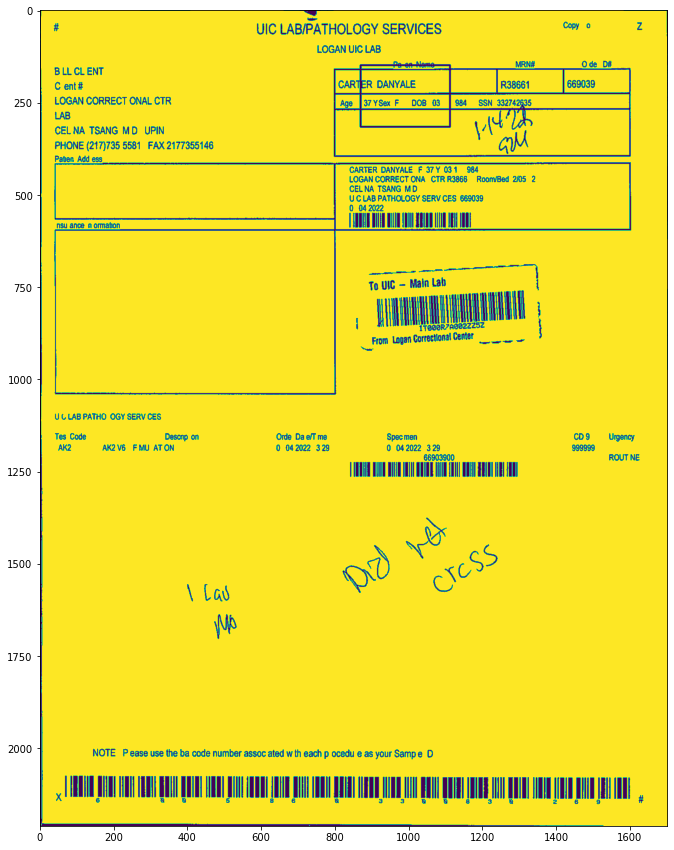

In [40]:


#img = cv.imread('/home/vimalkumar/Documents/UIC/UIC Sample Images/REF1-010622-5-1_10005.TIF')
# plt.figure(figsize=(15,15))
# plt.imshow(img)
key_vals = ["Name"]
to_find = key_vals[0]


for key in key_vals:
    to_find = key.lower()
    found_val = ""
    for i in range(len(image_data['text'])):
        if to_find in image_data['text'][i].lower():
            x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
            if to_find == "DAte":
                zoning_area = (x-15,y-40,x+w+10,h+y+20)
#             elif to_find == "4":
#                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
#             elif to_find=="Date":
                
#                 zoning_area = (x-60,y-10,x+w+100,h+y+10)
            
            else:
                #zoning_area = (x-30,y-10,x+w+300,h+y+58)
                zoning_area = (x+90,y+10,x+w-200,h+y+160)
            cv.rectangle(res, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)
            plt.figure(figsize=(15,15))
            plt.imshow(res)
            break


    for i in range(len(image_data['text'])):
        x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
        if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
            found_val += image_data['text'][i]+" "

    print(f"{to_find} = {found_val}")
    
    found_val = found_val.replace('!@#$%^&*()[]{};:./<>?\|`~-=_+','')
    print(found_val)
    
    output_list = found_val.split(' ')
    
    output_list = ' '.join(output_list).split()
    output_list = [x.lower() for x in output_list]
    
    print(output_list)
# cv.imshow("ABC", img)
# cv.waitKey(0)
# cv.imwrite("ABC.Jpeg",img)